

For this part, type the number of each channel you are using.
Example: if you are using all channels type 1234, or if you are only using 1, 2 and 4, type 124.

Insert the channels you are using: 2

This is where a noise floor will be set.
Example: if you want a floor at 75 mV, type .075 :
Where would you like to set the noise floor?:1e-3

4

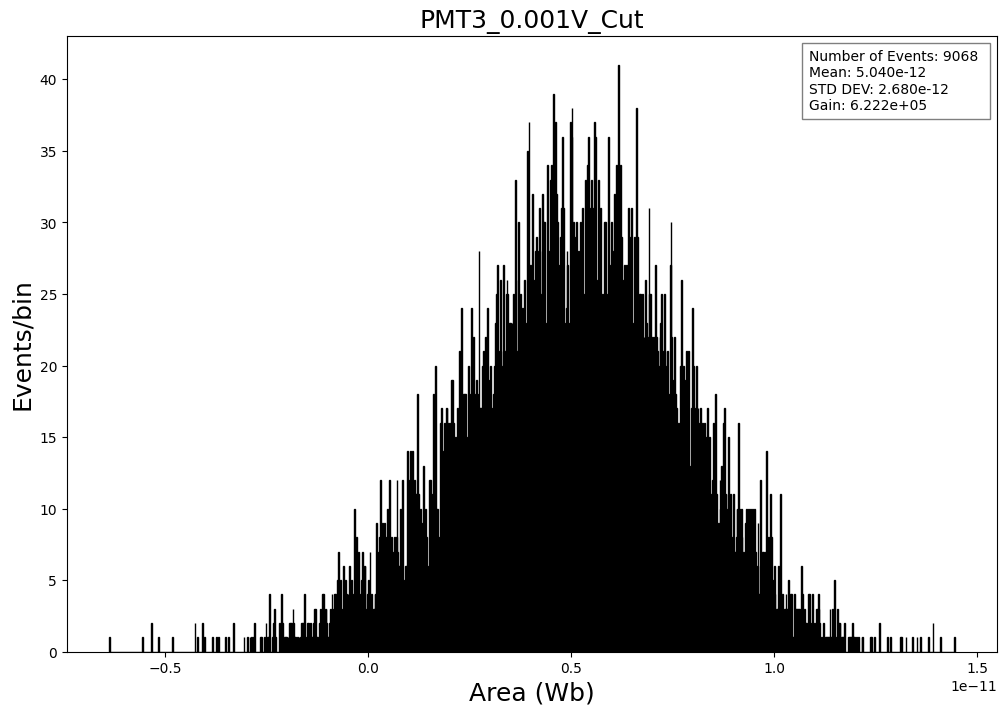

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os
import os.path
from operator import add
from scipy.optimize import curve_fit
from PIL import Image
import time
import sys
#import curses
#import Module_Test as m
#stdscr = curses.initscr()
import math
import statistics 
from matplotlib.offsetbox import AnchoredText

gain = lambda Wb:Wb/(1.62e-19*50)

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.7f} + {:.7f}x'.format(a, b))

    return a, b

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def attn_factor(value):
    c = (10**(value/20))
    return c

def gauss(x,*p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

print("")
#Array of all files that need to be processed
#FileLocations = ["/media/ilker/Ilker/PMT_Characterization/with_light_FW46_FS9_1200/tube_withteflon/10k"]
FileLocations = ["/media/ilker/Ilker/PMT_Characterization_06302022/tube3/1200_FW43_FS9_0dBamp_0dBscope_1hour/10k"]


#,   "/media/pslaserlab/Laserlab2/ANL_Post_test_facescan/2570_FW13_Fiber_Ch4-9dB-9dB_Ch3-9dB-12dB_Ch2-9db-9db_10PE_26_56", "/media/pslaserlab/Laserlab2/ANL_Post_test_facescan/2570_FW13_Fiber_Ch4-9dB-9dB_Ch3-9dB-12dB_Ch2-9db-9db_10PE_22_44", "/media/pslaserlab/Laserlab2/ANL_Post_test_facescan/2570_FW13_Fiber_Ch4-9dB-9dB_Ch3-9dB-12dB_Ch2-9db-9db_10PE_20_34", "/media/pslaserlab/Laserlab2/ANL_Post_test_facescan/2570_FW13_Fiber_Ch4-9dB-9dB_Ch3-9dB-12dB_Ch2-9db-9db_10PE_20_13"]
#, "/media/pslaserlab/Laserlab31/Grid_2013/090319/1525_1461p6_32FW_0dB_0dB_20PE/1000000", "/media/pslaserlab/Laserlab31/Grid_2013/090319/1525_1461p6_32FW_0dB_0dB_20PE/2000000", "/media/pslaserlab/Laserlab31/Grid_2013/090319/1525_1461p6_32FW_0dB_0dB_20PE/5000000", "/media/pslaserlab/Laserlab31/Grid_2013/090319/1525_1461p6_32FW_0dB_0dB_20PE/10000000", "/media/pslaserlab/Laserlab31/Grid_2013/090319/1525_1461p6_32FW_0dB_0dB_20PE/20000000", "/media/pslaserlab/Laserlab31/Grid_2013/090319/1525_1461p6_32FW_0dB_0dB_20PE/50000000"]
print("")
print("For this part, type the number of each channel you are using.\nExample: if you are using all channels type 1234, or if you are only using 1, 2 and 4, type 124.")
print("")
Squares = input("Insert the channels you are using: ")
print("")
print("This is where a noise floor will be set.\nExample: if you want a floor at 75 mV, type .075 :")
Noise = float(input("Where would you like to set the noise floor?:"))
print("")
#len(FileLocations)
for q in range(0,len(FileLocations)):
    FileLocation = FileLocations[q]
    os.chdir(FileLocation)
    Nc1 = int(len(glob.glob('C1*.txt'))) #Finds the number of trace files in directory
    Nc2 = int(len(glob.glob('C2*.txt')))
    Nc3 = int(len(glob.glob('C3*.txt')))
    Nc4 = int(len(glob.glob('C4*.txt')))
    if(Nc1 != 0):
        Length = Nc1
    elif(Nc2 != 0):
        Length = Nc2
    elif(Nc3 != 0):
        Length = Nc3
    elif(Nc4 != 0):
        Length = Nc4

    File1 = []
    File2 = []
    File3 = []
    File4 = []
    if(Squares.find("1")!= -1): #Finds all of the trace file names
        for file in glob.glob("C1*"):
            File1.append(file)

    if(Squares.find("2")!= -1):
        for file in glob.glob("C2*"):
            File2.append(file)

    if(Squares.find("3")!= -1):
        for file in glob.glob("C3*"):
            File3.append(file)

    if(Squares.find("4")!= -1):
        for file in glob.glob("C4*"):
            File4.append(file)
    
    Voltage1 = []
    Voltage2 = []
    Voltage3 = []
    Voltage4 = []
    Time1 = []
    Time2 = []
    Time3 = []
    Time4 = []
    cutVolt1 = []
    cutVolt2 = []
    cutVolt3 = []
    cutVolt4 = []
    cutTime1 = []
    cutTime2 = []
    cutTime3 = []
    cutTime4 = []
    MinV1 = []
    MinV2 = []
    MinV3 = []
    MinV4 = []
    Start = time.time()
    InputFile = []
    if (Squares.find("1") != -1):
        inFile = open(File1[0]) #Imports data set size numbers
        for line in inFile:
            if line.startswith("Segments,"):
                InputFile = line
    elif (Squares.find("2") != -1):
        inFile = open(File2[0])
        for line in inFile:
            if line.startswith("Segments,"):
                InputFile = line
    elif (Squares.find("3") != -1):
        inFile = open(File3[0])
        for line in inFile:
            if line.startswith("Segments,"):
                InputFile = line
    elif (Squares.find("4") != -1):
        inFile = open(File4[0])
        for line in inFile:
            if line.startswith("Segments,"):
                InputFile = line

    
            
    Reshaper = int(InputFile.split(",")[3]) #Pulls the length of a sample size from an input file
    Reshaper = int(Reshaper)
    Reshaper
    inFile.close()

    for k in range(0, Length): #Imports all the data from all the files
        #Length
        print("", end="\r", flush=True)
        print(k,  end="", flush=True)
        if (Squares.find("1") != -1):
            Voltage1 = []
            Time1 = []
            try: 
                Sig1 = pd.read_csv(File1[k],header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
                Sig1 = np.array(Sig1)
                Voltage1 = np.append(Voltage1, Sig1[:,1], axis=0)
                Voltage1 = np.array(Voltage1).reshape(-1, Reshaper)
                Voltage1 = pd.DataFrame(Voltage1)
                Voltage1 = Voltage1.transpose()
                Time1 = np.append(Time1, Sig1[:,0], axis = 0)
                Time1=np.array(Time1).reshape(-1, Reshaper)
                Time1 = pd.DataFrame(Time1)
                Time1 = Time1.transpose()
            except CParserError:
                raise NameError("\n%s is a bad file and should be looked at" %str(File4[k]))
            #print("Worked1!")
        if (Squares.find("2") != -1):
            Voltage2 = []
            Time2 = []
            try:
                Sig2 = pd.read_csv(File2[k] ,header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
                Sig2 = np.array(Sig2)
                Voltage2 = np.append(Voltage2, Sig2[:,1], axis=0)
                Voltage2 = np.array(Voltage2).reshape(-1, Reshaper)
                Voltage2 = pd.DataFrame(Voltage2)
                Voltage2 = Voltage2.transpose()
                Time2 = np.append(Time2, Sig2[:,0], axis = 0)
                Time2 = np.array(Time2).reshape(-1, Reshaper)
                Time2 = pd.DataFrame(Time2)
                Time2 = Time2.transpose()
            except CParserError:
                raise NameError("\n%s is a bad file and should be looked at" %str(File4[k]))
            #print("Worked2!")
        if (Squares.find("3") != -1):
            Voltage3 = []
            Time3 = []
            try:
                Sig3 = pd.read_csv(File3[k] ,header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
                Sig3 = np.array(Sig3)
                Voltage3 = np.append(Voltage3, Sig3[:,1], axis=0)
                Voltage3 = np.array(Voltage3).reshape(-1, Reshaper)
                Voltage3 = pd.DataFrame(Voltage3)
                Voltage3 = Voltage3.transpose()
                Time3 = np.append(Time3, Sig3[:,0], axis = 0)
                Time3 = np.array(Time3).reshape(-1, Reshaper)
                Time3 = pd.DataFrame(Time3)
                Time3 = Time3.transpose()
            except CParserError:
                raise NameError("\n%s is a bad file and should be looked at" %str(File4[k]))
            #print("Worked3!")
        if (Squares.find("4") != -1):
            Voltage4 = []
            Time4 = []
            try:
                Sig4 = pd.read_csv(File4[k],header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
                Sig4 = np.array(Sig4)
                Voltage4 = np.append(Voltage4, Sig4[:,1], axis=0)
                Voltage4 = np.array(Voltage4).reshape(-1, Reshaper)
                Voltage4 = pd.DataFrame(Voltage4)
                Voltage4 = Voltage4.transpose()
                Time4 = np.append(Time4, Sig4[:,0], axis = 0)
                Time4 = np.array(Time4).reshape(-1, Reshaper)
                Time4 = pd.DataFrame(Time4)
                Time4 = Time4.transpose()
            except CParserError:
                raise NameError("\n%s is a bad file and should be looked at" %str(File4[k]))
            #print("Worked4!")
        if (Squares.find("1") != -1): #Checks the data for the filter
            tD = Time1[0][1] - Time1[0][0]
            for i in range(0, len(Voltage1.columns)):
                if(abs(min(Voltage1[i])) > Noise):
                    MinV1.append(np.trapz(Voltage1[i]) * tD)
        if (Squares.find("2") != -1):
            tD = Time2[0][1] - Time2[0][0]
            for i in range(0, len(Voltage2.columns)):
                if(abs(min(Voltage2[i])) > Noise):
                    MinV2.append(np.trapz(Voltage2[i]) * tD)
        if (Squares.find("3") != -1):
            tD = Time3[0][1] - Time3[0][0]
            for i in range(0, len(Voltage3.columns)):
                if(abs(min(Voltage3[i])) > Noise):
                    MinV3.append(np.trapz(Voltage3[i]) * tD)
        if (Squares.find("4") != -1 and ((len(Voltage4)/Reshaper)%1) == 0.0):
            tD = Time4[0][1] - Time4[0][0]
            for i in range(0, len(Voltage4.columns)):
                if(abs(min(Voltage4[i])) > Noise):
                    MinV4.append(np.trapz(Voltage4[i]) * tD)

    if (Squares.find("1") != -1):
        t_cor1 = T1 = MinV1
    if (Squares.find("2") != -1):
        t_cor2 = T2 = MinV2
    if (Squares.find("3") != -1):
        t_cor3 = T3 = MinV3
    if (Squares.find("4") != -1):
        t_cor4 = T4 = MinV4

    #Name = FileLocation.split("/")[4] + "_" + FileLocation.split("/")[5]

    if(Squares.find("1") != -1):
        histo, bin_edges = np.histogram(T1, 100)
        bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
        middle = np.where(histo == max(histo))[0]
        width = (np.where(histo[middle[0]:99] == find_nearest(histo[middle[0]:99] , .5 * max(histo)))[0])+middle
        width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

    if(Squares.find("1") != -1): #Graphs all data



        fig, ax = plt.subplots(figsize=[12,8])
        n, bins, patches = ax.hist(T1, 100, fill=False)
        #Line below is used to obtain bin edge locations
        histo, bin_edges = np.histogram(T1, bins)
        #Line below uses knowledge of bin edge locations to find bin centers
        bin_centers = (bin_edges[:-1]+bin_edges[1:])/2



        #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T1),100e-4])



        #defines the range of x-axis over which to place the fit curve
        #Use the mean calculated above to make initial guess at sensible values
        #adjust as necessary
        #vars = np.linspace(bin_edges[width[0]], bin_edges[width2[0]])
        #hist_fit = gauss(vars,*coeff)
        #plt.plot(vars,hist_fit, 'r', linewidth=2)
        plt.title("Ch1_Area_%0.3fV_Cut" %(Noise), fontsize = "18")
        plt.xlabel('Area (Wb)', fontsize ='18')
        plt.ylabel('Events/bin', fontsize ='18')
        #text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e" %(sum(histo), abs(np.mean(T1)), abs(np.std(T1))), frameon=True, loc=1, pad=0.5)
        #plt.setp(text_box.patch, facecolor='white', alpha=0.5)
        #ax.add_artist(text_box)
        #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
        #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
        plt.savefig("Ch1_Area_%0.3fV_Cut.png" %(Noise))
        plt.show()
        #CFD time@level distro

        #print('Fitted mean = ', coeff[1])
        #print('Fitted sigma = ', coeff[2])
        #print('Bin width = ', bin_edges[2] - bin_edges[1])
        #print('N = ', len(t_cor1))

        #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)

        histo = pd.DataFrame(histo)
        bin_centers = pd.DataFrame(bin_centers)
        histo.to_csv("Ch1_Area_%0.3fV_Cut_Histo" %(Noise), index = False)
        bin_centers.to_csv("Ch1_Area_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)

    if(Squares.find("2") != -1):



        fig, ax = plt.subplots(figsize=[12,8])
        n, bins, patches = ax.hist(T2, 1000, fill=False)
        #Line below is used to obtain bin edge locations
        histo, bin_edges = np.histogram(T2, bins)
        #Line below uses knowledge of bin edge locations to find bin centers
        bin_centers = (bin_edges[:-1]+bin_edges[1:])/2



        #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T2),100e-4])



        #defines the range of x-axis over which to place the fit curve
        #Use the mean calculated above to make initial guess at sensible values
        #adjust as necessary
        #vars = np.linspace(bin_edges[width2] ,bin_edges[width])
        #hist_fit = gauss(vars,*coeff)
        #plt.plot(vars,hist_fit, 'r', linewidth=2)
        #plt.title("Ch2_Area_%0.3fV_Cut" %(Noise), fontsize = "18")
        plt.title("PMT3_%0.3fV_Cut" %(Noise), fontsize = "18")

        plt.xlabel('Area (Wb)', fontsize ='18')
        plt.ylabel('Events/bin', fontsize ='18')
        #plt.yscale("log")
        #plt.ylim(1,10**5,)
        text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e \nGain: %0.3e" %(sum(histo), abs(np.mean(T2)), abs(np.std(T2)),gain(abs(np.mean(T2)))), frameon=True, loc=1, pad=0.5)
        plt.setp(text_box.patch, facecolor='white', alpha=0.5)
        ax.add_artist(text_box)
        #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
        #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
        plt.savefig("PMT3_%0.3fV_Cut.png" %(Noise))
        plt.show()
        #CFD time@level distro

        #print('Fitted mean = ', coeff[1])
        #print('Fitted sigma = ', coeff[2])
        #print('Bin width = ', bin_edges[2] - bin_edges[1])
        #print('N = ', len(t_cor2))

        #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)

        histo = pd.DataFrame(histo)
        bin_centers = pd.DataFrame(bin_centers)
        histo.to_csv("Ch2_Area_%0.3fV_Cut_Histo" %(Noise), index = False)
        bin_centers.to_csv("Ch2_Area_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)

    #if(Squares.find("3") != -1):
        #histo, bin_edges = np.histogram(T3, 100)
        #bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
        #middle = np.where(histo == max(histo))[0]
        #width = (np.where(histo[middle[0]:99] == find_nearest(histo[middle[0]:99] , .5 * max(histo)))[0])+middle
        #width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

    if(Squares.find("3") != -1):

        fig, ax = plt.subplots(figsize=[12,8])
        n, bins, patches = ax.hist(T3, 1000, fill=False)
        #Line below is used to obtain bin edge locations
        histo, bin_edges = np.histogram(T3, bins)
        #Line below uses knowledge of bin edge locations to find bin centers
        bin_centers = (bin_edges[:-1]+bin_edges[1:])/2



        #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T3),100e-4])



        #defines the range of x-axis over which to place the fit curve
        #Use the mean calculated above to make initial guess at sensible values
        #adjust as necessary
        #vars = np.linspace(bin_edges[width2], bin_edges[width])
        #hist_fit = gauss(vars,*coeff)
        #plt.plot(vars,hist_fit, 'r', linewidth="2)
        plt.title("Ch3_Area_%0.3fV_Cut" %(Noise), fontsize = "18")
        plt.xlabel('Area (Wb)', fontsize ='18')
        plt.ylabel('Events/bin', fontsize ='18')
        text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e" %(sum(histo), abs(np.mean(T3)), abs(np.std(T3))), frameon=True, loc=1, pad=0.5)
        plt.setp(text_box.patch, facecolor='white', alpha=0.5)
        ax.add_artist(text_box)
        #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
        #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
        plt.savefig("Ch3_Area_%0.3fV_Cut.png" %(Noise))
        plt.show()
        #CFD time@level distro

        #print('Fitted mean = ', coeff[1])
        #print('Fitted sigma = ', coeff[2])
        ##print('Bin width = ', bin_edges[2] - bin_edges[1])
        #print('N = ', len(t_cor3))

        #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)

        histo = pd.DataFrame(histo)
        bin_centers = pd.DataFrame(bin_centers)
        histo.to_csv("Ch3_Area_%0.3fV_Cut_Histo" %(Noise), index = False)
        bin_centers.to_csv("Ch3_Area_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)

    #if(Squares.find("4") != -1):
        #histo, bin_edges = np.histogram(T4, 1000)
        #bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
        #middle = np.where(histo == max(histo))[0]
        #width = (np.where(histo[middle[0]:999] == find_nearest(histo[middle[0]:999] , .5 * max(histo)))[0])+middle
        #width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

    if(Squares.find("4") != -1):



        fig, ax = plt.subplots(figsize=[12,8])
        n, bins, patches = ax.hist(T4, 1000, fill=False)
        #Line below is used to obtain bin edge locations
        histo, bin_edges = np.histogram(T4, bins)
        #Line below uses knowledge of bin edge locations to find bin centers
        bin_centers = (bin_edges[:-1]+bin_edges[1:])/2



        #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T4),100e-5])



        #defines the range of x-axis over which to place the fit curve
        #Use the mean calculated above to make initial guess at sensible values
        #adjust as necessary
        #vars = np.linspace(bin_edges[width2], bin_edges[width])
        #hist_fit = gauss(vars,*coeff)
        #plt.plot(vars,hist_fit, 'r', linewidth=2)
        #plt.title("Ch4_Area_%0.3fV_Cut" %(Noise), fontsize = "18")
        plt.title("PMT1_%0.3fV_Cut" %(Noise), fontsize = "18")
        plt.xlabel('Area (Wb)', fontsize ='18')
        plt.ylabel('Events/bin', fontsize ='18')
        #plt.yscale("log")
        text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e \nGain: %0.3e" %(sum(histo), abs(np.mean(T4)), abs(np.std(T4)),gain(abs(np.mean(T4)))), frameon=True, loc=1, pad=0.5)
        plt.setp(text_box.patch, facecolor='white', alpha=0.5)
        ax.add_artist(text_box)
        #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
        #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
        #plt.savefig("Ch4_Area_%0.3fV_Cut.png" %(Noise))
        plt.savefig("PMT1_%0.3fV_Cut.png" %(Noise))
        plt.show()
        #CFD time@level distro

        #print('Fitted mean = ', coeff[1])
        #print('Fitted sigma = ', coeff[2])
        #print('Bin width = ', bin_edges[2] - bin_edges[1])\
        
        #print('N = ', len(t_cor4))

        #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)

        histo = pd.DataFrame(n)
        bin_centers = pd.DataFrame(bins)
        #histo.to_csv("Ch4_Area_%0.3fV_Cut_Histo" %(Noise), index = False)
        #bin_centers.to_csv("Ch4_Area_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)
